In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
np.random.seed(42)
X = np.random.randn(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Labels: 1 if x1 + x2 > 0, else 0

In [20]:
# Add bias term (intercept)
X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [21]:
# === Initialize parameters ===
theta = np.zeros(X_b.shape[1])  # [bias, coef1, coef2]
learning_rate = 0.1
n_epochs = 1000

In [22]:
# === Sigmoid function ===
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [23]:
# === Gradient descent ===
for epoch in range(n_epochs):
    z = X_b.dot(theta)
    h = sigmoid(z)
    gradient = X_b.T.dot(h - y) / len(y)
    theta -= learning_rate * gradient

In [24]:
# === Make predictions ===
y_prob = sigmoid(X_b.dot(theta))
y_pred = (y_prob >= 0.5).astype(int)

In [25]:
# === Evaluate accuracy ===
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy:.2f}")
print(f"Final coefficients: {theta}")

Accuracy: 0.99
Final coefficients: [-0.17462947  3.73358795  3.74240946]


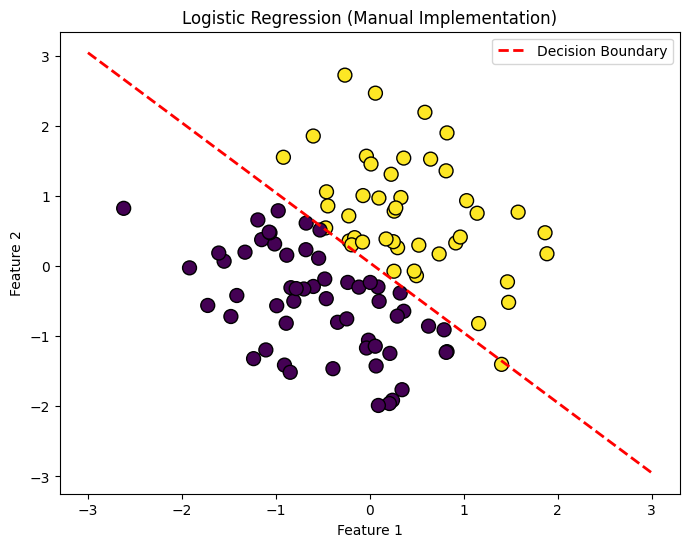

In [26]:
# === Plot decision boundary ===
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
x1 = np.linspace(-3, 3, 100)
x2 = -(theta[0] + theta[1] * x1) / theta[2]  # Decision boundary equation
plt.plot(x1, x2, 'r--', lw=2, label='Decision Boundary')
plt.title('Logistic Regression (Manual Implementation)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()